# Heart Disease Prediction

A Healthcare organization together with a couple of government hospitals in a city has collected information about the vitals that would reveal if the person might have a coronary heart disease in the next ten years or not. This study is useful in early identification of disease and have medical intervention if necessary. This would help not only in improving the health conditions but also the economy as it has been identified that health performance and economic performance are interlinked.


As a data scientist, you are required to construct a classification model based on the available data and evaluate its efficacy. Your activities should include - performing various activities pertaining to the data such as, preparing the dataset for analysis; checking for any correlations; creating a model; evaluating the performance of the classification model. Visualizations would be a value add.


#### Demonstrate Data Mining process with following activities:
* Problem statement
* Perform exploratory data analysis
* Preprocess the data
* Select Training data, test data
* Train the model
* Test the model (Predictions and reporting)
* Evaluate the model performance
* Suggest ways of improving the model
* Any interesting observations
* Challenges faced and how you mitigated the challenges
* Assumptions if any

#### Important Points to be considered
* Missing Data may be represented by either NAs, Blanks or values such as -999/-99 etc. Please check for various possibilities.
* Results can be varying from team to team. But, you should be able to justify your result.

## Step 1 : Loading the dataset

In [1]:
#Import required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading a file 
df = pd.read_csv('Dataset')

In [3]:
#Dimension of the dataframe
df.shape

(34281, 25)

In [4]:
#First 10 rows of the dataframe
df.head(10)

,ID,IV,A1,A2,A3,A4,A5,A6,A7,A8,...,A14,A15,A16,A17,A18,A19,A20,A21,A22,Target
0,1443894,2049,44,8.0,11,0,0,0,0,38,...,0,0.52,0.69,0,0,0,1,17.078971,0,0
1,1810849,48,0,8.0,0,0,0,0,0,1,...,0,0.59,0.78,1,0,0,1,17.022384,0,0
2,2264999,318,2,9.0,0,0,0,0,0,0,...,0,0.94,0.79,1,0,0,0,17.024773,0,0
3,1931676,62,4,2.0,0,0,0,15,30,7,...,0,0.51,0.47,0,0,0,1,17.074995,0,0
4,2070885,2,0,8.0,0,0,0,0,1,0,...,0,0.82,0.81,0,0,0,1,17.072697,0,0
5,1566137,6648,2327,6.0,1404,0,11604,23532,35880,10516,...,0,0.74,0.50,0,0,0,1,17.073619,0,0
6,3265646,10,3,8.0,0,0,3,12,21,3,...,0,0.98,0.98,0,0,0,1,17.078496,0,0
7,2809957,22,0,8.0,1,0,0,0,3,5,...,0,0.99,0.99,0,0,0,1,17.091436,0,0
8,1240251,160,43,8.0,13,0,0,120,180,15,...,0,1.00,1.00,0,0,0,1,17.049562,0,0
9,1784378,8,0,12.0,0,0,0,0,0,0,...,0,0.74,0.74,0,0,0,1,17.051237,0,0


## Step 2 : Data Exploration

In [5]:
#Names of columns
df.columns

Index(['ID', 'IV', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20',
       'A21', 'A22', 'Target'],
      dtype='object')

In [6]:
#Data types of all the columns 
df.dtypes

ID          int64
IV          int64
A1          int64
A2        float64
A3          int64
A4          int64
A5          int64
A6          int64
A7          int64
A8          int64
A9          int64
A10         int64
A11         int64
A12         int64
A13         int64
A14         int64
A15       float64
A16       float64
A17         int64
A18         int64
A19         int64
A20         int64
A21       float64
A22         int64
Target      int64
dtype: object

In [7]:
#Summary of a dataset
df.describe()

,ID,IV,A1,A2,A3,A4,A5,A6,A7,A8,...,A14,A15,A16,A17,A18,A19,A20,A21,A22,Target
count,3.428100e+04,34281.000000,34281.000000,32538.000000,34281.000000,34281.000000,34281.000000,34281.000000,34281.000000,34281.000000,...,34281.000000,34281.000000,34281.000000,34281.000000,34281.000000,34281.000000,34281.000000,34281.000000,34281.000000,34281.000000
mean,1.979838e+06,236.252005,36.126367,7.355185,22.543071,1.695371,151.959044,274.418453,387.933637,36.482746,...,1.744757,-5.742893,-5.368822,0.208658,0.000321,0.131939,0.962370,17.049826,0.000204,0.329424
std,6.384855e+05,3326.574620,427.707021,6.165307,359.486291,36.195759,2274.087109,4065.441226,5443.804648,375.931751,...,26.077507,24.618128,23.938095,0.406355,0.017910,0.338429,0.190303,0.028818,0.014288,0.470011
min,1.058628e+06,-2999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-99.000000,-99.000000,0.000000,0.000000,0.000000,0.000000,17.000005,0.000000,0.000000
25%,1.464342e+06,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.590000,0.610000,0.000000,0.000000,0.000000,1.000000,17.024869,0.000000,0.000000
50%,1.841719e+06,8.000000,0.000000,8.000000,0.000000,0.000000,0.000000,2.000000,4.000000,1.000000,...,0.000000,0.810000,0.790000,0.000000,0.000000,0.000000,1.000000,17.049813,0.000000,0.000000
75%,2.254242e+06,40.000000,4.000000,8.000000,0.000000,0.000000,18.000000,33.000000,48.000000,6.000000,...,0.000000,0.960000,0.940000,0.000000,0.000000,0.000000,1.000000,17.074796,0.000000,1.000000
max,3.274754e+06,366924.000000,50547.000000,52.000000,31750.000000,2999.000000,260660.000000,438020.000000,533540.000000,21071.000000,...,1488.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,17.099995,1.000000,1.000000


In [8]:
#Let's remove ID column because we won't use this in prediction
df.drop('ID', axis=1, inplace=True)

## Step 3 : EDA(Exploratory Data Analysis)

In [9]:
#Correlation among all variables
df.corr()

,IV,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,A14,A15,A16,A17,A18,A19,A20,A21,A22,Target
IV,1.000000,0.181166,0.027141,0.168334,-0.009892,0.130558,0.196113,0.238763,0.227272,0.064426,...,0.004802,-0.027457,-0.026723,-0.015144,-0.001063,-0.005293,-0.016280,-0.005399,-0.000857,-0.045262
A1,0.181166,1.000000,-0.006628,0.393940,0.045052,0.758050,0.772104,0.758885,0.580734,0.170352,...,0.073534,-0.008643,-0.007344,-0.034095,0.000086,0.014152,-0.013930,0.000467,0.004335,-0.019512
A2,0.027141,-0.006628,1.000000,-0.006445,0.009243,-0.006401,-0.006888,-0.007617,-0.015345,0.000991,...,-0.010997,-0.066833,-0.079008,0.062852,-0.009466,-0.001309,-0.205401,-0.002733,-0.000034,-0.119445
A3,0.168334,0.393940,-0.006445,1.000000,0.015554,0.296429,0.353874,0.381771,0.529193,0.148992,...,0.073718,0.005612,0.006327,-0.028410,-0.000204,-0.003313,0.001448,-0.002475,-0.000896,-0.035494
A4,-0.009892,0.045052,0.009243,0.015554,1.000000,0.078510,0.059922,0.059241,0.075362,0.023463,...,0.035459,0.008419,0.008462,0.007045,-0.000704,-0.001508,0.003634,0.001205,-0.000669,0.054918
A5,0.130558,0.758050,-0.006401,0.296429,0.078510,1.000000,0.970169,0.947507,0.292820,0.087086,...,0.091565,0.012851,0.013040,-0.020347,0.000123,0.008585,0.001676,0.003505,-0.000955,0.001651
A6,0.196113,0.772104,-0.006888,0.353874,0.059922,0.970169,1.000000,0.991285,0.341883,0.100950,...,0.079476,0.011496,0.011500,-0.022747,0.000105,0.006578,0.003142,0.000888,-0.000965,-0.005127
A7,0.238763,0.758885,-0.007617,0.381771,0.059241,0.947507,0.991285,1.000000,0.376267,0.110888,...,0.082423,0.010307,0.010456,-0.025277,0.000156,0.005785,0.003666,0.000564,-0.001018,-0.007982
A8,0.227272,0.580734,-0.015345,0.529193,0.075362,0.292820,0.341883,0.376267,1.000000,0.245770,...,0.100221,-0.011140,-0.007753,-0.040510,0.000462,0.005955,-0.022062,-0.000775,-0.001197,-0.013272
A9,0.064426,0.170352,0.000991,0.148992,0.023463,0.087086,0.100950,0.110888,0.245770,1.000000,...,0.028246,-0.001629,-0.000979,-0.013792,0.000169,-0.000232,-0.004913,-0.000769,-0.000157,-0.009048


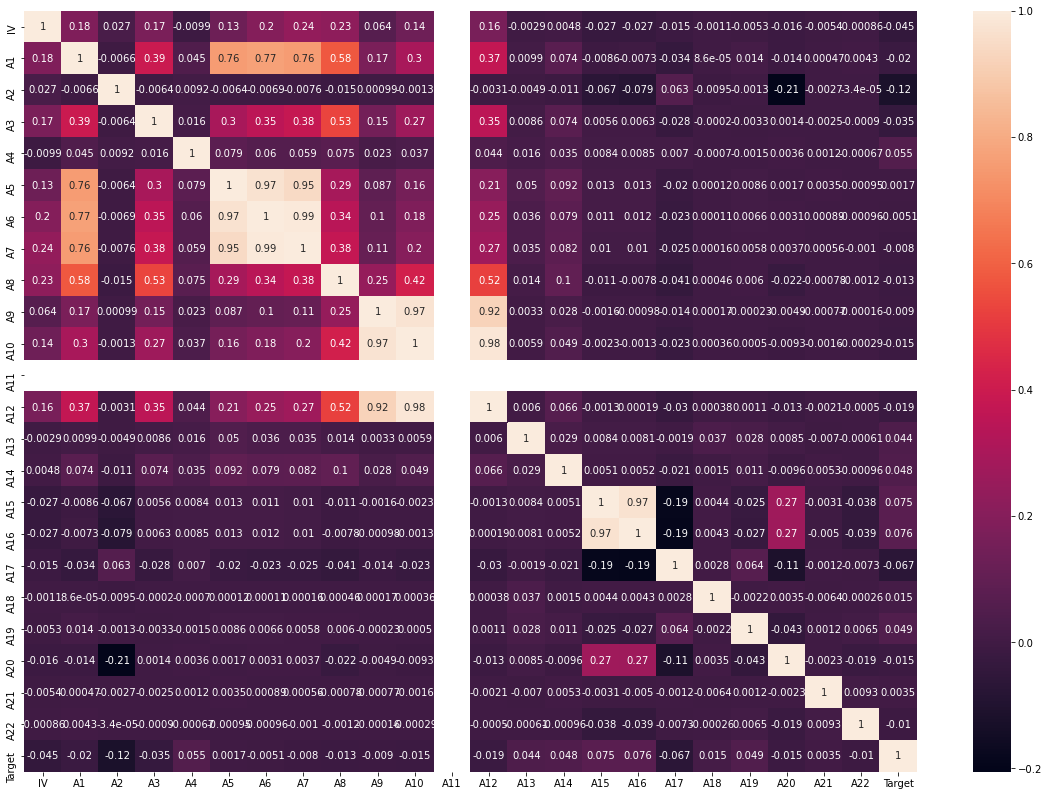

In [10]:
#Let's visualize the above correlation
plt.figure(figsize=(20, 14))
sns.heatmap(df.corr(), annot=True)

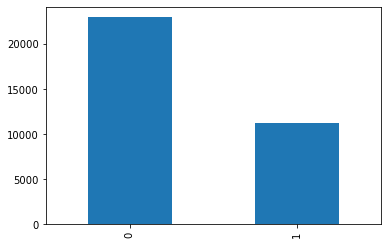

In [11]:
#Barplot of our Target variable
df['Target'].value_counts().plot.bar()

Let's visualize above plot in a percentage format

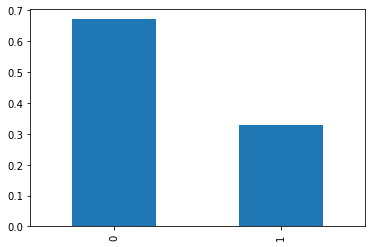

In [12]:
#Barplot of our Target variable in a percentage format
(df['Target'].value_counts()/len(df)).plot.bar()

We can see that around 30% people might have heart disease in next 10 years.

## Step 4 : Data Preprocessing

In [13]:
#Let's check for a missing values
df.isnull().sum()

IV           0
A1           0
A2        1743
A3           0
A4           0
A5           0
A6           0
A7           0
A8           0
A9           0
A10          0
A11          0
A12          0
A13          0
A14          0
A15          0
A16          0
A17          0
A18          0
A19          0
A20          0
A21          0
A22          0
Target       0
dtype: int64

We can see that there are 1743 missing values in A2 column. So either we can remove it or replace it with some value.

In [14]:
#Impute missing values in A2 column with the mean of that column
df['A2'].fillna(df['A2'].mean(), inplace=True)

In [15]:
#Let's verify whether we have successfully imputed missing values or not
df['A2'].isnull().sum()

0

We have successfully imputed missing values.

In [16]:
#Separating Dependent and Indepedent columns
X = df.drop('Target', axis=1)      #Independent columns
y = df['Target']                   #Dependent column(Target Variable)

In [17]:
#Splitting dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=11)

In [18]:
#Dimensions of train and test dataset
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((27424, 23), (6857, 23), (27424,), (6857,))

## Step 5 : Model building

We will create various models and use the best one for making prediction.

### 1. Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

### 2. Decision Tree

In [20]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
dtc_pred = dtc.predict(X_test)

### 3. Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

### 4. K Nearest Neighbors(KNN)

In [22]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

### 5. Naive Bayes

In [23]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)

### 6. Support Vector Machine

In [24]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)

### 7. AdaBoost

In [25]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier()
abc.fit(X_train, y_train)
abc_pred = abc.predict(X_test)

### 8. Gradient Boosting

In [26]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
gbc_pred = gbc.predict(X_test)

## Step 6 : Evaluate performance of models

In [27]:
#Calculating accuracy of all models
from sklearn.metrics import accuracy_score
print("Logistic Regression Score : ", accuracy_score(y_test, lr_pred)*100)
print("Decision Tree Score       : ", accuracy_score(y_test, dtc_pred)*100)
print("Random Forest Score       : ", accuracy_score(y_test, rfc_pred)*100)
print("KNN Score                 : ", accuracy_score(y_test, knn_pred)*100)
print("Naive Bayes Score         : ", accuracy_score(y_test, nb_pred)*100)
print("SVM Score                 : ", accuracy_score(y_test, svc_pred)*100)
print("AdaBoost Score            : ", accuracy_score(y_test, abc_pred)*100)
print("Gradient Boosting Score   : ", accuracy_score(y_test, gbc_pred)*100)

Logistic Regression Score :  68.47017646200962
Decision Tree Score       :  86.96222837975792
Random Forest Score       :  91.07481405862622
KNN Score                 :  88.14350298964561
Naive Bayes Score         :  40.688347673909874
SVM Score                 :  68.70351465655534
AdaBoost Score            :  86.7434738223713
Gradient Boosting Score   :  87.85183024646346


We got maximum accuracy in Random Forest. So we will use it.

We use **GridSearchCV** to tune the Random Forest model in order to get maximum accuracy.

## Step 7 : Tuning the model

In [28]:
#Implement GridSearchCV
from sklearn.model_selection import GridSearchCV
#Create lists of parameters with different values
model_parameters = {
    'max_depth' : [3, 5, 7, None],
    'max_features' : [1, 3, 5, 7, 10, None],
    'min_samples_split' : [3, 5, 7, 10, None],
    'bootstrap' : [True, False],
    'criterion' : ['gini', 'entropy']
}
grid_search = GridSearchCV(estimator=rfc, param_grid=model_parameters, cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 320 candidates, totalling 1600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   18.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 13.4min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 22.8min
[Parallel(n_jobs=-1)]: Done 1600 out of 1600 | elapsed: 32.7min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, None],
                         'max_features': [1, 3, 5, 7, 10],
                         'min_samples_split': [3, 5, 7, 10]},
             verbose=1)

In [29]:
print("Best Parameters are : ", grid_search.best_params_)

Best Parameters are :  {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 1, 'min_samples_split': 3}


In [30]:
#Implement model with the Best Parameter
tuned_rfc = RandomForestClassifier(max_depth=None, max_features=1, min_samples_split=3, criterion='entropy', bootstrap=False)
tuned_rfc.fit(X_train, y_train)
pred = tuned_rfc.predict(X_test)
print(pred)

[0 0 0 ... 1 0 1]


In [31]:
#Calculating Accuracy of the model
print("Accuracy : ", accuracy_score(y_test, pred)*100)

Accuracy :  91.57065772203588


We got around 92% accuracy.